## 군집
* 각 군집화 기법은 나름의 장단점을 가지고 있으며 군집화하려는 데이터의 특성에 맞게 수행해야 함
* K-평균의 경우 거리 기반으로 군집 중심점을 이동시키면서 군집화를 수행. 매우 직관적인 알고리즘으로 많은 군집화 애플리케이션에 애용되지만 복잡한 구조를 가지는 데이터세트에 적용하기에는 한계가 있음. 평가는 실루엣 계수를 이용
* 평균이동(Mean Shift)은 K-평균과 유사하나 거리 중심이 아니고 데이터가 모여있는 밀도가 가장 높은 쪽으로 군집 중심점을 이동하면서 군집화를 수행. 컴퓨터 비전 영역에서 이미지나 영상 데이터의 특정 개체 구분에 적합한 알고리즘
* GMM(Gausian Mixture Model)은 군집화를 적용하고자 하는 데이터를 여러 개의 가우시안 분포 모델을 섞어서 생성된 모델로 가정해 수행하는 방식. K-평균 보다 유연하고 다양한 데이터 세트에 잘 적용될 수 있으나 수행 시간이 오래 걸림
* DBSCAN(Density Based Spatial Clustering of Applications with Noise)은 밀도 기반 군집화의 대표적인 알고리즘으로 데이터의 분포가 기하학적으로 복잡한 데이터 세트에 효과적인 군집화가 가능함



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

iris = load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
df_iris.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
kmeans = KMeans(n_clusters=3, n_init='auto', max_iter=300, random_state=0).fit(df_iris)
print(kmeans.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [ ]:
df_iris['cluster'] = kmeans.labels_
df_iris.head()

,sepal length,sepal width,petal length,petal width,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df_iris['target'] = iris.target
df_iris.head()

,sepal length,sepal width,petal length,petal width,cluster,target
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [ ]:
iris_result = df_iris.groupby(['target', 'cluster'])['sepal length'].count()
iris_result

target  cluster
0       0          50
1       1           3
        2          47
2       1          36
        2          14
Name: sepal length, dtype: int64

## 군집 평가
- 실루엣 분석으로 평가, 이를 위해 metrics 모듈의 silhouette_samples, silhouette_score을 이용

- 대부분의 군집화 데이터 세트는 타겟 레이블을 가지고 있지 않다.
- 비지도 학습의 특성상 정확하게 성능을 평가하기 어렵지만 군집화의 성능을 평가하는 방법으로 실루엣 분석 이용
- 실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는 지를 나타냄.
- 효율적으로 잘 분리됐다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미
- 실루엣 계수는 -1에서 1사이의 값을 가지며 1로 가까워질수록 근처의 군집과 멀리 떨어져 있다는 것이고 0에 가까울수록 근처의 군집과 가까워진다는 것임.
 - 실루엣 계수 : s(i) = (b(i) - a(i))/max(a(i),b(i))
   - a(i) : 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 포인트와의 거리를 평균한 값
   - b(i) : 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균 거리
   - \- 값은 아예 다른 군집에 테이터 포인트가 할당되었음을 의미
- silhouette_samples : 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해 주면 각 데이터 포인트의 실루엣 계수를 반환
- silhouette_score : 인자로 X feature 데이터 세트와 각 피처 데이터 세트가 속한 군집 레이블 값인 labels 데이터를 입력해 주면 전체 데이터의 실루엣 계수 값을 평균해 반환. 즉 np.mean(silhouette_samples())과 같음. 이 값이 높을수록 군집화가 잘 됐다고 판단할 수 있지만 무조건 높다고 해서 군집화가 잘되었다고는 할 수 없다.
 - 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 함

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
features_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_iris = pd.DataFrame(data=iris.data, columns = features_names)
kmeans = KMeans(n_clusters=3, n_init='auto', max_iter=300, random_state=0).fit(df_iris)
df_iris['cluster'] = kmeans.labels_

score_samples = silhouette_samples(iris.data, df_iris['cluster'])
print(score_samples.shape)

df_iris['silhouette_coeff'] = score_samples
average_score = silhouette_score(iris.data, df_iris['cluster'])

print('score:{:.4f}'.format(average_score))
df_iris.head()


(150,)
score:0.5512


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,0.852582
1,4.9,3.0,1.4,0.2,0,0.814916
2,4.7,3.2,1.3,0.2,0,0.828797
3,4.6,3.1,1.5,0.2,0,0.804352
4,5.0,3.6,1.4,0.2,0,0.848918


In [ ]:
df_iris['silhouette_coeff'].mean()

0.551191604619592

In [ ]:
df_iris.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.797604
1    0.436842
2    0.422323
Name: silhouette_coeff, dtype: float64

In [ ]:
# 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, n_init='auto', max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")



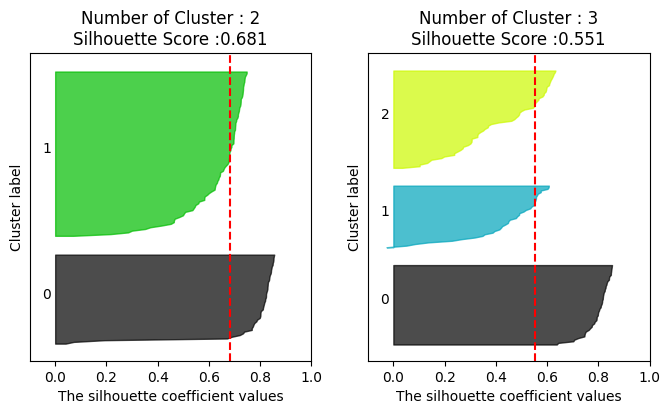

In [ ]:
visualize_silhouette([2,3], iris.data)

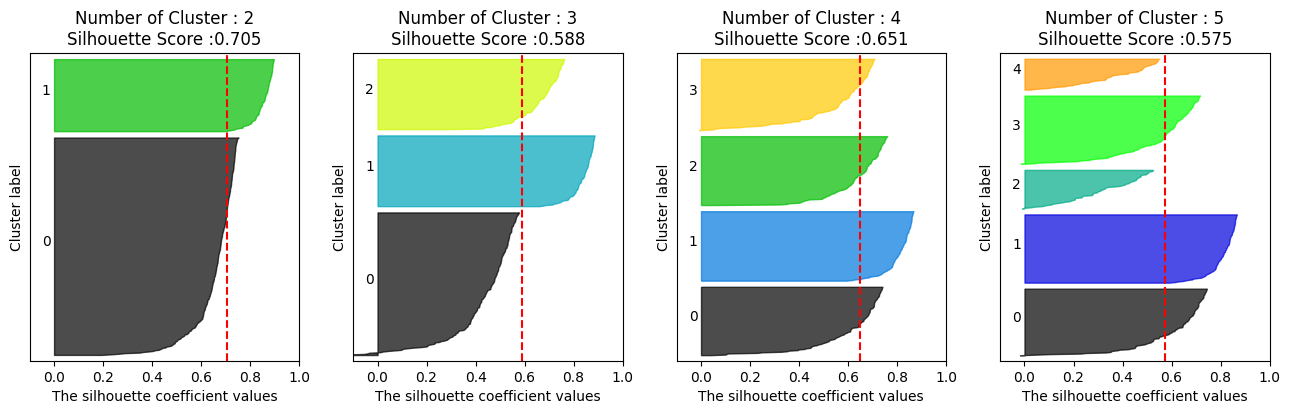

In [ ]:
# make_blobs를 통해 clustering을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# cluster 계수를 2,3,4,5개일때의 클러스터별 실루엣 계수 평균값을 시각화
# 4개의 군집일 때 가장 최적
visualize_silhouette([2,3,4,5], X)

실루엣 다이어그램을 해석할 때 주의해야 할 요소

1. 실루엣 계수의 값
  - 값의 범위: 실루엣 계수는 -1에서 1 사이의 값을 가진다. 1에 가까울수록 해당 데이터 포인트가 자신의 클러스터에 잘 속해 있으며, 다른 클러스터와는 멀리 떨어져 있다는 것을 의미. 0에 가까운 값은 클러스터 경계에 위치한 데이터 포인트를 의미하며, -1에 가까울수록 다른 클러스터에 할당되어야 할 데이터 포인트를 나타낸다.
  - 평균 실루엣 스코어: 모든 데이터 포인트의 실루엣 스코어의 평균값이 높을수록 클러스터링 품질이 좋다고 할 수 있다.

2. 실루엣 다이어그램의 형태
  - 너비: 각 클러스터에 대한 실루엣 계수의 너비(가로축)는 클러스터 내의 데이터 포인트가 얼마나 그 클러스터에 잘 속해 있는지를 나타냅니다. 넓고 균일한 너비는 좋은 클러스터링을 의미.
  - 높이: 세로축은 클러스터에 속한 데이터 포인트의 수를 나타냅니다. 높이가 불균일하면, 일부 클러스터가 다른 것보다 훨씬 많거나 적은 수의 데이터 포인트를 가지고 있음을 의미.
  
3. 실루엣 다이어그램의 일관성
  - 일관된 너비와 높이: 모든 클러스터의 실루엣 계수가 1에 가깝고, 너비와 높이가 비교적 균일하다면, 이는 클러스터링이 잘 되었음을 의미.
  - 불균일한 너비 또는 음수 값: 일부 클러스터의 실루엣 계수가 매우 낮거나 음수 값을 가진다면, 이는 클러스터링 결과에 문제가 있을 수 있음을 나타낸다. 이는 잘못된 클러스터 할당이나, 적절하지 않은 클러스터 수를 선택했을 가능성을 시사.
  - 실루엣 다이어그램을 통한 시각화는 클러스터링의 품질을 직관적으로 이해하는 데 도움을 준다. 좋은 클러스터링 결과를 얻기 위해, 실루엣 스코어를 기반으로 다양한 클러스터 수를 실험해 보고, 최적의 클러스터링 구조를 찾는 것이 중요.

## Online Retail Data set 기반으로 고객 세그멘테이션을 위한 군집분석을 다음 사항을 준수하여 수행하세요.
- 목표 :
  - 타깃 마케팅 : 고객을 여러 특성에 맞게 세분화해서 그 유형에 따라 맞춤형 마케팅이나 서비스를 제공.
  - 고객의 상품 구매 이력 데이터 기반에 기초한 타깃 마케팅
- 군집화 방법 :기본적인 고객 분석 요소인 RFM 기법을 이용해서 고객을 군집화
  - RECENCY(R): 가장 최근 상품 구입 일에서 오늘까지의 기간
  - FREQUENCY(F): 상품 구매 횟수
  - MONETARY VALUE(M) : 총 구매 금액
- 데이터셋
  - UCI 에서 제공하는 Online Retail Data set
  - 데이터셋 칼럼 구성
    - InvoiceNo: 주문번호, ‘C’로 시작하는 것은 취소 주문
    - StockCode: 제품 코드(Item Code)
    - Description: 제품 설명
    - Quantity : 주문 제품 건수
    - InvoiceDate: 주문 일자
    - UnitPrice: 제품 단가
    - CustomerID: 고객 번호
    - Country: 국가명(주문 고객의 국적)

- 분석 가이드
  - 데이터 세트 로딩과 데이터 클렌징
    * Null 데이터 제거:  CustomerID의 Null 값이 많은 것으로 확인됨. 고객 세그멘이션을 수행하므로 고객 식별 번호가 없는 데이터는 삭제
    * 오류 데이터 삭제: 대표적인 오류 데이터는 Quantity 또는 UnitPrice 가 0보다 작은 경우. Quantity 가 0보다 작은 경우는 반환을 뜻하는 값으로 InvoiceNO 앞자리가 ‘C’로 되어있음. 분석의 효율성을 위해 삭제    
    * Country 칼럼의 주요 주문 고객 국가인 영국 데이터만을 필터링하여 선택
  - RFM 기반 데이터 가공
    * UnitPrice’(제품 단가), ‘Quantity’(주문 제품 건수)를 곱해서 주문 금액 칼럼 생성, CusmtomerID int형으로 형변환
    * 주문 금액, 주문 횟수가 특정 고객에게 과도하게 되어있는지 탐색.
    
      CustomerID로 group by 하여 TOP-5 구매 횟수 고객 ID 추출<br>
      CustomerID로 group by 하고 주문 금액 칼럼을 더하여 TOP-5 주문 금액 고객 ID 추출
    * 온라인 데이터 세트에 대해서 ‘InvocieNO(주문번호)’ + ‘StockCode(상품코드)’ 거의 1에 가까운 유일한 식별자 레벨로 되어있는지 확인
    * 주문번호 기준의 데이터를 개별 고객 기준의 데이터로 변환 - 고객 레벨로 주문 기간, 주문 횟수, 주문 금액 데이터를 기반으로 하여 세그멘테이션을 수행하기 위한 데이터 처리
    * 개별 고객 기준의 데이터 셋은 CustomerID, Recency, Frequency, Monetary 4개의 칼럼으로 구성
  - RFM 기반 고객 세그멘테이션
    * 온라인 판매 데이터는 소매업체로 추정되는 특정 고객의 대규모 주문이 포함되어 있어 주문 횟수와 주문 금액에서 개인 고객 주문과 매우 큰 차이가 있음을 왜곡된 데이터 분포도를 시각화하여 확인
    * 왜곡 정도가 매우 높은 데이터 세트에 K-평균을 적용하면 중심의 개수를 증가시키더라도 변별력이 떨어지는 군집화가 수행되기 때문에 StandScaler로 평균과 표준편차를 재조정한 후 시각화하여 군집화 결과를 확인. 시각화는 제공된 사용자 함수 이용하며 군집 개수를 2 ~ 5개 변화시키면서 수행
      - visualize_silhouette(cluster_lists, X_features)
      - visualize_kmeans_plot_multi(cluster_lists, X_features)    
    
    * 데이터 세트의 왜곡정도를 낮추기 위해 로그변환 이용하여 다시 시각화하여 군집화 결과를 확인
    * 3개 군집의 특징을 통계적 방법을 통해서 해석 및 활용 방안 수립

https://jominseoo.tistory.com/38

# 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성

In [ ]:
# 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산.
        clusterer = KMeans(n_clusters = n_cluster, n_init='auto', max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현.
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

# 군집 개수별로 군집화 구성을 시각화하는 사용자 함수

In [ ]:
# 군집 개수별로 군집화 구성을 시각화하는 사용자 함수
def visualize_kmeans_plot_multi(cluster_lists, X_features):

    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings('ignore')

    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])

     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장.
        clusterer = KMeans(n_clusters = n_cluster, n_init='auto', max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels

        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']

        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70, edgecolor='k', marker=markers[label], label=cluster_legend)
            # axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70, marker='o', edgecolor='k', facecolor='none')

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))
        axs[ind].legend(loc='upper right')

    plt.show()

In [ ]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/ktd231026/m5_ml/Online_Retail.xlsx', header=1)
print(df.shape)
df.info()

(541908, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541908 entries, 0 to 541907
Data columns (total 8 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   536365                              541908 non-null  object        
 1   85123A                              541908 non-null  object        
 2   WHITE HANGING HEART T-LIGHT HOLDER  540454 non-null  object        
 3   6                                   541908 non-null  int64         
 4   2010-12-01 08:26:00                 541908 non-null  datetime64[ns]
 5   2.55                                541908 non-null  float64       
 6   17850                               406828 non-null  float64       
 7   United Kingdom                      541908 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.head()

,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
0,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
1,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom


In [ ]:
print(df.describe())

                   6           2.55          17850
count  541908.000000  541908.000000  406828.000000
mean        9.552256       4.611117   15287.684272
std       218.081359      96.759942    1713.597701
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [ ]:
# 컬럼명 변경
df.columns = ['주문번호', '상품코드', '거래 품목', '건수', '거래일시', '단가', '고객ID', '지역']

# 결과 확인
df.head

<bound method NDFrame.head of           주문번호    상품코드                                거래 품목  건수  \
0       536365   71053                  WHITE METAL LANTERN   6   
1       536365  84406B       CREAM CUPID HEARTS COAT HANGER   8   
2       536365  84029G  KNITTED UNION FLAG HOT WATER BOTTLE   6   
3       536365  84029E       RED WOOLLY HOTTIE WHITE HEART.   6   
4       536365   22752         SET 7 BABUSHKA NESTING BOXES   2   
...        ...     ...                                  ...  ..   
541903  581587   22613          PACK OF 20 SPACEBOY NAPKINS  12   
541904  581587   22899         CHILDREN'S APRON DOLLY GIRL    6   
541905  581587   23254        CHILDRENS CUTLERY DOLLY GIRL    4   
541906  581587   23255      CHILDRENS CUTLERY CIRCUS PARADE   4   
541907  581587   22138        BAKING SET 9 PIECE RETROSPOT    3   

                      거래일시    단가     고객ID              지역  
0      2010-12-01 08:26:00  3.39  17850.0  United Kingdom  
1      2010-12-01 08:26:00  2.75  17850.0  Un

In [ ]:
# Null 데이터 제거
df.dropna(subset=['고객ID'], inplace=True)

# 오류 데이터 삭제 (수량이나 단가가 0보다 작은 경우 삭제)
df = df[(df['건수'] > 0) & (df['단가'] > 0)]

# '주문번호' 열을 문자열로 변환하여 취소된 주문 (주문번호 앞자리가 ‘C’인 경우) 제거
df['주문번호'] = df['주문번호'].astype(str)
df = df[~df['주문번호'].str.contains('C')]

# 지역 필터링: 영국에 해당하는 데이터만 선택
df = df[df['지역'] == 'United Kingdom']

# 새로운 특성 추가 (예: 주문 금액)
df['주문 금액'] = df['건수'] * df['단가']

# '고객ID' 열을 정수형으로 변환
df['고객ID'] = df['고객ID'].astype(int)

# 결과 확인
print(df.head())

<ipython-input-10-f610a6f8d6bb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['주문번호'] = df['주문번호'].astype(str)


     주문번호    상품코드                                거래 품목  건수  \
0  536365   71053                  WHITE METAL LANTERN   6   
1  536365  84406B       CREAM CUPID HEARTS COAT HANGER   8   
2  536365  84029G  KNITTED UNION FLAG HOT WATER BOTTLE   6   
3  536365  84029E       RED WOOLLY HOTTIE WHITE HEART.   6   
4  536365   22752         SET 7 BABUSHKA NESTING BOXES   2   

                 거래일시    단가   고객ID              지역  주문 금액  
0 2010-12-01 08:26:00  3.39  17850  United Kingdom  20.34  
1 2010-12-01 08:26:00  2.75  17850  United Kingdom  22.00  
2 2010-12-01 08:26:00  3.39  17850  United Kingdom  20.34  
3 2010-12-01 08:26:00  3.39  17850  United Kingdom  20.34  
4 2010-12-01 08:26:00  7.65  17850  United Kingdom  15.30  


In [ ]:
df.isnull().sum()

주문번호     0
상품코드     0
거래 품목    0
건수       0
거래일시     0
단가       0
고객ID     0
지역       0
주문 금액    0
dtype: int64

In [ ]:
import pandas as pd
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# 현재 날짜 설정
now = dt.datetime(2011, 12, 10)

# Recency 계산
recency_df = df.groupby('고객ID')['거래일시'].max()
recency_df = recency_df.apply(lambda x: (now - x).days)
recency_df = recency_df.reset_index()

# Frequency 계산
frequency_df = df.groupby('고객ID')['건수'].count()
frequency_df = frequency_df.reset_index()

# Monetary 계산
monetary_df = df.groupby('고객ID')['주문 금액'].sum()
monetary_df = monetary_df.reset_index()

# RFM 데이터프레임 병합
rfm = pd.merge(recency_df, frequency_df, on='고객ID')
rfm = pd.merge(rfm, monetary_df, on='고객ID')
rfm.columns = ['고객ID', 'Recency', 'Frequency', 'Monetary']

# 데이터 표준화
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# K-Means 군집화
kmeans = KMeans(n_clusters=3, random_state=0)  # 군집 수는 조정 가능
kmeans.fit(rfm_scaled)
rfm['Cluster'] = kmeans.labels_


# 결과 확인
print(rfm.head())

    고객ID  Recency  Frequency  Monetary  Cluster
0  12346      325          1  77183.60        0
1  12747        2        103   4196.01        1
2  12748        0       4595  33719.73        0
3  12749        3        199   4090.88        1
4  12820        3         59    942.34        1


In [ ]:
# 고객별 구매 횟수 계산
purchase_counts = df.groupby('고객ID')['건수'].nunique()

# 구매 횟수가 가장 높은 TOP-5 고객 ID 추출
top_5_customers = purchase_counts.sort_values(ascending=False).head(5)
top_5_customers

고객ID
17450    102
18102     74
13694     59
12748     58
14088     56
Name: 건수, dtype: int64

In [ ]:
# 고객별 총 주문 금액 계산
total_spent = df.groupby('고객ID')['주문 금액'].sum()

# 총 주문 금액이 가장 높은 TOP-5 고객 ID 추출
top_5_spenders = total_spent.sort_values(ascending=False).head(5)
top_5_spenders

고객ID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: 주문 금액, dtype: float64

In [ ]:
# 유일한 식별자 확인
df['주문_상품_코드'] = df['주문번호'].astype(str) + '-' + df['상품코드'].astype(str)
is_unique = df['주문_상품_코드'].nunique() == len(df)
print(f"주문번호와 상품코드의 조합이 유일한 식별자인가? {is_unique}")

# Recency, Frequency, Monetary 계산
now = pd.Timestamp('now')
df['거래일시'] = pd.to_datetime(df['거래일시'])
recency_df = df.groupby('고객ID')['거래일시'].max().reset_index()
recency_df['Recency'] = (now - recency_df['거래일시']).dt.days
frequency_df = df.groupby('고객ID').size().reset_index(name='Frequency')
monetary_df = df.groupby('고객ID')['주문 금액'].sum().reset_index()

# 고객 기준 데이터셋 구성
rfm_df = recency_df[['고객ID', 'Recency']]
rfm_df = rfm_df.merge(frequency_df, on='고객ID')
rfm_df = rfm_df.merge(monetary_df, on='고객ID')

# 결과 확인
print(rfm_df.head())

주문번호와 상품코드의 조합이 유일한 식별자인가? False
    고객ID  Recency  Frequency     주문 금액
0  12346     4759          1  77183.60
1  12747     4436        103   4196.01
2  12748     4434       4595  33719.73
3  12749     4437        199   4090.88
4  12820     4437         59    942.34


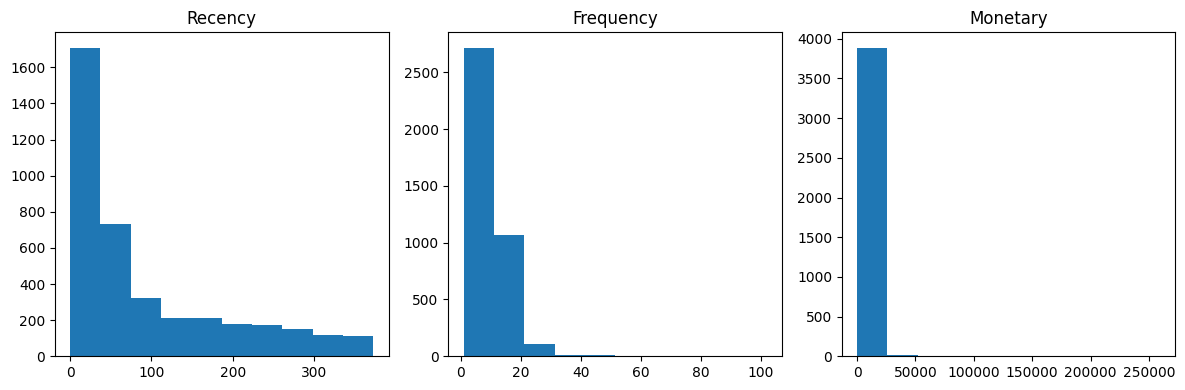

In [ ]:
import matplotlib.pyplot as plt

# RFM 데이터 계산
rfm = df.groupby('고객ID').agg({
    '거래일시': lambda x: (df['거래일시'].max() - x.max()).days,
    '건수': 'nunique',
    '주문 금액': 'sum'
}).rename(columns={'거래일시': 'Recency', '건수': 'Frequency', '주문 금액': 'Monetary'})

# 히스토그램 그리기
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(rfm['Recency'])
plt.title('Recency')

plt.subplot(1, 3, 2)
plt.hist(rfm['Frequency'])
plt.title('Frequency')

plt.subplot(1, 3, 3)
plt.hist(rfm['Monetary'])
plt.title('Monetary')

plt.tight_layout()
plt.show()

### RFM 기반 고객 세그먼테이션
- 온라인 판매 데이터는 소매업체의 대규모 주문이 포함되어있어 주문 횟수와 주문 금액에서 개인 고객 주문과 매우 큰 차이를 나타냄. 이로 인해 왜곡된 데이터 분포도를 가짐
- 맥플롯립의 hist()를 통해 각 칼럼의 값 분포도를 확인하면 모두 왜곡된 데이터 값 분포도를 가지고 있음을 확인할 수 있음
- describe()를 통해 각 칼럼의 데이터 값 백분위로 어떻게 값이 분포되어 있는지 확인
  - Recency는 평균이 92.7이지만, 50%인 51보다 크게 높음, max 는 374로 75%인 143보다 훨씬 커 왜곡 정도가 심함
  - Frequency의 경우 평균이 90.3이지만 max 값 7847를 포함한 상위의 몇 개의 큰 값으로 인해 75%가 99.25에 가까움
  - Monetary도 마찬가지로 상위의 큰 값으로 인해 평균은 1864.3으로 75%인 1576.5보다 높은 값이 확인 됨

- 왜곡 정도가 매우 높은 데이터 세트에 K-평균을 적용하면 중심의 개수를 증가시키더라도 변별력이 떨어지는 군집화가 수행되기 때문에 StandScaler로 평균과 표준편차를 재조정
- 군집을 3개로 구성할 경우 전체 군집의 평균 실루엣 계수는 0.576

In [ ]:
print(rfm_df.columns)

Index(['고객ID', 'Recency', 'Frequency', '주문 금액'], dtype='object')


In [ ]:
rfm_df.rename(columns={'주문 금액': 'Monetary'}, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

# 데이터 표준화
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

# 표준화된 데이터로 K-평균 군집화 실행
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(rfm_scaled)
rfm_df['Cluster'] = kmeans.labels_

# 결과 확인
print(rfm_df.head())

    고객ID  Recency  Frequency  Monetary  Cluster
0  12346     4759          1  77183.60        0
1  12747     4436        103   4196.01        1
2  12748     4434       4595  33719.73        0
3  12749     4437        199   4090.88        1
4  12820     4437         59    942.34        1


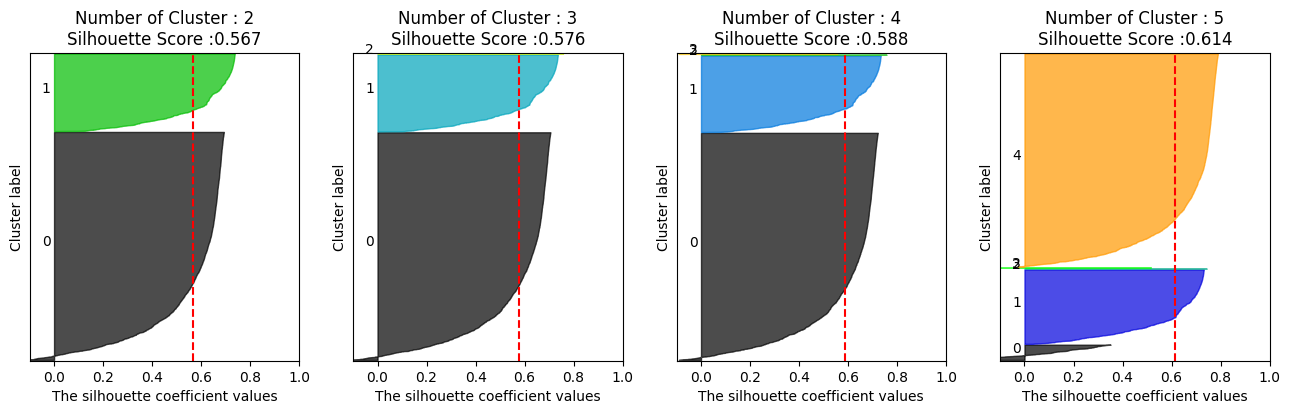

In [ ]:
# 사용자 정의 함수 visualize_silhouette()를 이용하여 군집 개수를 2~5까지 변화시키며 시각화 수행
cluster_lists = [2, 3, 4, 5]

# 데이터가 이미 표준화된 rfm_scaled 사용
visualize_silhouette(cluster_lists, rfm_scaled)

- 군집 개수를 2~5개까지 변화시키면서 각 군집별 평균 실루엣 계수를 생성하여 확인
  - 군집이 2개일 때는 너무 개괄적으로 군집화, 3~5개일 때는 소수의 데이터 세트의 실루엣 계수가 매우 작은 것이 확인됨. 이는 특정 소매점의 대량 주문 구매 데이터로 해석할 수 있음
- 이처럼 지나치게 왜곡된 데이터 세트는 K-평균과 같은 거리 기반 군집화 알고리즘에서 지나치게 일반적인 군집화 결과를 도출하게 됨

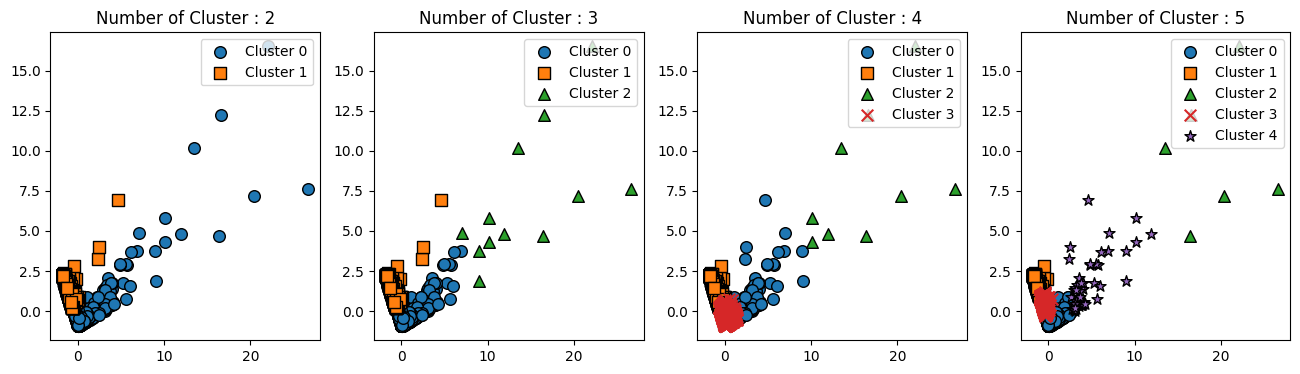

In [ ]:
# 사용자 정의 함수 visualize_silhouette()를 이용하여 군집 개수를 2~5까지 변화시키며 시각화 수행
cluster_lists = [2, 3, 4, 5]

# 데이터가 이미 표준화된 rfm_scaled 사용
visualize_kmeans_plot_multi(cluster_lists, rfm_scaled)

In [ ]:
# 로그 변환을 통해 데이터 세트의 왜곡 정도 낮추기
rfm_log = np.log1p(rfm_df[['Recency', 'Frequency', 'Monetary']])

# 로그 변환된 데이터의 표준화
scaler = StandardScaler()
rfm_log_scaled = scaler.fit_transform(rfm_log)

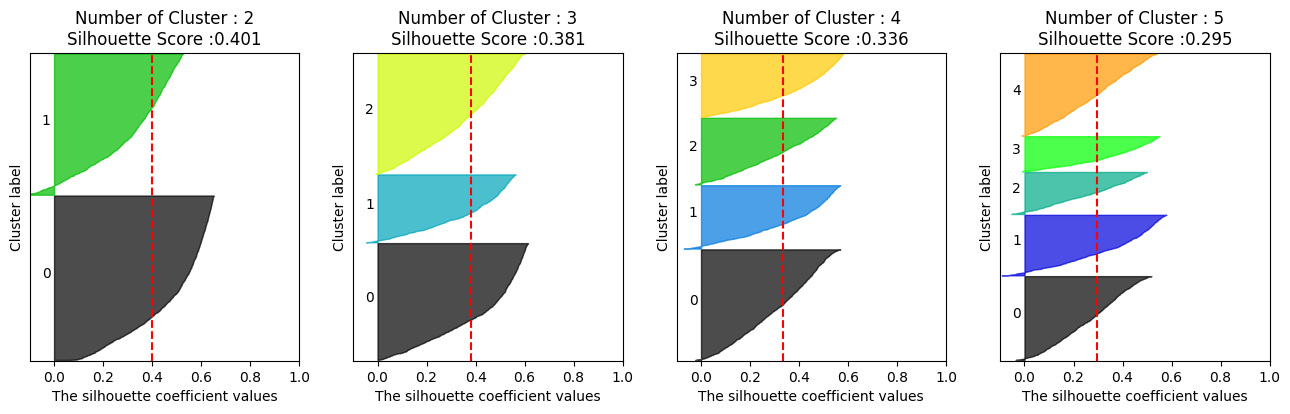

In [ ]:
# 사용자 정의 함수 visualize_silhouette()를 이용하여 군집 개수를 2~5까지 변화시키며 시각화 수행
cluster_lists = [2, 3, 4, 5]

# 데이터가 이미 표준화된 rfm_scaled 사용
visualize_silhouette(cluster_lists, rfm_log_scaled)

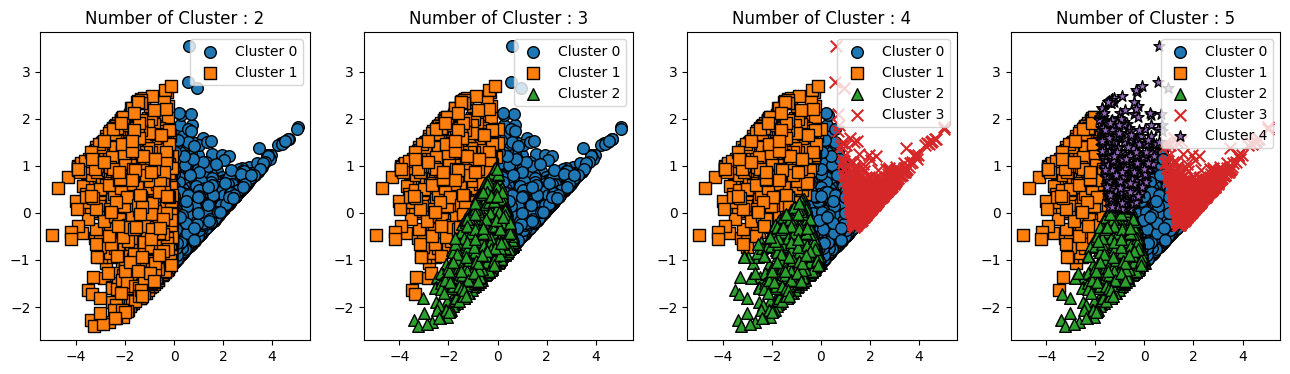

In [ ]:
# 사용자 정의 함수 visualize_silhouette()를 이용하여 군집 개수를 2~5까지 변화시키며 시각화 수행
cluster_lists = [2, 3, 4, 5]

# 데이터가 이미 표준화된 rfm_scaled 사용
visualize_kmeans_plot_multi(cluster_lists, rfm_log_scaled)

- 비지도학습의 군집화의 기능적 의미는 숨어있는 새로운 집단을 발견하는 것. 새로운 군집 내의 데이터 값을 분석하고 이해함으로써 이 집단에 새로운 의미를 부여할 수 있음
- 데이터 세트의 왜곡정도를 낮추기 위해 로그변환 이용
- 실루엣 스코어는 로그 변환 하기 전보다 떨어지지만 더 균일하게 군집화가 구성됐음을 확인할 수 있음